In [ ]:
# prompt: run drive google

from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA Available: True
CUDA Device Name: Tesla T4


In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
!nvidia-smi

Fri Apr  4 00:07:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!pip install --pre cudf-cu12 dask-cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.ngc.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   Unnamed: 0                          title  year            kind  \
0           0                Dinosaur Planet  2003  tv mini series   
1           1                      Character  2021           movie   
2           2              Get Up and Dance!  1994     video movie   
3           3  The Rise and Fall of El Chapo  2016        tv movie   
4           4                    Sick - IMDb  <NA>            <NA>   

                                    genre rating  vote            country  \
0  ['Documentary', 'Animation', 'Family']    7.7   474  ['United States']   
1         ['Crime', 'Horror', 'Thriller']    8.3    46          ['Japan']   
2                              ['Family']    8.1    18  ['United States']   
3                         ['Documentary']    6.9    42  ['United States']   
4                            ['Thriller']   <NA>  <NA>  ['United States']   

       language                            

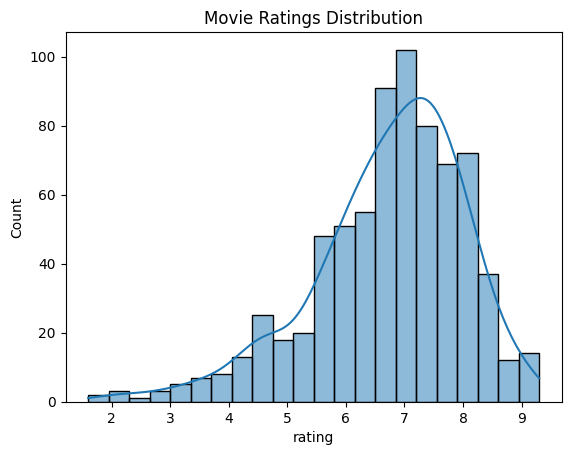

In [ ]:
# Install RAPIDS if not already installed
!pip install --pre cudf-cu12 dask-cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.ngc.nvidia.com

import warnings
warnings.filterwarnings("ignore")

import cudf  # RAPIDS library for GPU-accelerated DataFrames
import cupy as cp  # RAPIDS library for GPU-accelerated numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Load the CSV data into a GPU-accelerated DataFrame using cuDF
movie_data = cudf.read_csv('/content/drive/MyDrive/imdb.csv')

# Display the first few rows (processed on GPU)
print(movie_data.head())

# Example: Compute basic statistics using cuDF and cuPy
mean_rating = movie_data['rating'].mean()  # GPU-accelerated mean computation
median_rating = movie_data['rating'].median()  # GPU-accelerated median computation

print(f"Mean Rating: {mean_rating}, Median Rating: {median_rating}")

# If plotting is required, convert cuDF DataFrame to Pandas (as matplotlib requires Pandas)
movie_data_pandas = movie_data.to_pandas()

# Visualization Example
sns.histplot(movie_data_pandas['rating'], kde=True)
plt.title("Movie Ratings Distribution")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie_data.isnull().sum()

Unnamed: 0      0
title           0
year            8
kind            5
genre          10
rating         78
vote           78
country        60
language       73
cast           34
director      162
composer      351
writer        143
runtime        81
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")  # Update with correct path

# Drop irrelevant columns
df.drop(columns=["Unnamed: 0", "title"], inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical with mode

# Encode categorical columns using Label Encoding
categorical_cols = ["kind", "genre", "country", "language"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numerical columns
scaler = MinMaxScaler()
numerical_cols = ["year", "rating", "vote", "runtime"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop high-cardinality text columns (or process with NLP methods)
df.drop(columns=["cast", "director", "composer", "writer"], inplace=True)

# Final processed dataset
print("Preprocessed dataset shape:", df.shape)
df.head()


Preprocessed dataset shape: (814, 8)


,year,kind,genre,rating,vote,country,language,runtime
0,0.837607,2,226,0.792208,0.000191,128,63,0.063063
1,0.991453,1,217,0.870130,0.000017,62,90,0.159588
2,0.760684,6,294,0.844156,0.000005,128,63,0.068211
3,0.948718,3,257,0.688312,0.000015,128,63,0.108108
4,0.803419,1,329,0.688312,0.000439,128,63,0.117117


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")  # Update with correct path

# Drop irrelevant columns
df.drop(columns=["Unnamed: 0", "title"], inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical with mode

# Encode categorical columns using Label Encoding
categorical_cols = ["kind", "genre", "country", "language"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numerical columns
scaler = MinMaxScaler()
numerical_cols = ["year", "rating", "vote", "runtime"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Drop high-cardinality text columns (or process with NLP methods)
df.drop(columns=["cast", "director", "composer", "writer"], inplace=True)

# Final processed dataset
print("Preprocessed dataset shape:", df.shape)
df.head()


Preprocessed dataset shape: (814, 8)


,year,kind,genre,rating,vote,country,language,runtime
0,0.837607,2,226,0.792208,0.000191,128,63,0.063063
1,0.991453,1,217,0.870130,0.000017,62,90,0.159588
2,0.760684,6,294,0.844156,0.000005,128,63,0.068211
3,0.948718,3,257,0.688312,0.000015,128,63,0.108108
4,0.803419,1,329,0.688312,0.000439,128,63,0.117117


In [ ]:
import cuml
print("cuML version:", cuml.__version__)

cuML version: 25.02.01


In [ ]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Check CUDA availability and GPU name
print(" CUDA Available:", tf.config.list_physical_devices('GPU'))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(" GPU Name:", tf.config.experimental.get_device_details(gpus[0])['device_name'])
else:
    print(" No GPU available. Using CPU.")

 CUDA Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
 GPU Name: Tesla T4


In [ ]:
import cudf  # GPU-accelerated Pandas alternative

# Load dataset
df = cudf.read_csv("/content/drive/MyDrive/imdb.csv")

# Drop missing values
df = df.dropna()

# Encode categorical features (if any)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].factorize()[0]

# Split features and target (Assume last column is the target)
X = df.iloc[:, :-1].to_pandas()
y = df.iloc[:, -1].to_pandas()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load IMDb dataset
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')

# Print column names to find the correct target variable
print(df.columns)

# Set the correct target column name
target_col = 'genre'  # Change if needed

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical target variable if necessary
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Handle categorical features in X
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoders for future use

# Fill missing values (Fixed Warning)
X.ffill(inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=42),
                                  n_estimators=10, random_state=42)  # Fixed parameter name

# Train models
rf_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)

# Evaluate models
rf_score = rf_model.score(X_test, y_test)
bagging_score = bagging_model.score(X_test, y_test)

print(f"Random Forest Accuracy: {rf_score:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_score:.4f}")


Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')
Random Forest Accuracy: 0.1104
Bagging Classifier Accuracy: 0.1166


In [ ]:
import torch
import multiprocessing

# Check GPU availability
num_gpus = torch.cuda.device_count()
gpu_name = torch.cuda.get_device_name(0) if num_gpus > 0 else "No GPU"

# Check CPU availability
num_cpus = multiprocessing.cpu_count()

# Print system details
print(f"Number of GPUs Available: {num_gpus}")
print(f"GPU 0: {gpu_name}")
print(f"Number of CPU Cores Available: {num_cpus}")


Number of GPUs Available: 1
GPU 0: Tesla T4
Number of CPU Cores Available: 2


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import cupy as cp  # GPU acceleration
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/content/drive/MyDrive/imdb.csv'  # Correct file path
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()

# Handle missing values
df = df.dropna(subset=['title', 'genre', 'rating'])  # Ensure required columns have values

# Preprocessing: Encode categorical variables as integers
title_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
df['title'] = title_encoder.fit_transform(df['title'])
df['genre'] = genre_encoder.fit_transform(df['genre'])

# Aggregate ratings (resolve duplicates by averaging ratings per movie-genre pair)
df_grouped = df.groupby(['title', 'genre'])['rating'].mean().reset_index()

# Create a user-item matrix
user_item_matrix = df_grouped.pivot(index='title', columns='genre', values='rating').fillna(0)

# Convert to CuPy array for GPU acceleration
matrix = cp.array(user_item_matrix.values)

# Parallelized SVD using CuPy
U, sigma, Vt = cp.linalg.svd(matrix, full_matrices=False)
sigma = cp.diag(sigma)

# Convert back to NumPy if needed
U = cp.asnumpy(U)
sigma = cp.asnumpy(sigma)
Vt = cp.asnumpy(Vt)

# Compute predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
predicted_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Function to recommend movies based on highest predicted ratings
def recommend_movies(movie_name, n=5):
    if movie_name not in title_encoder.classes_:
        return "Movie not found"

    movie_id = title_encoder.transform([movie_name])[0]

    if movie_id not in predicted_df.index:
        return "No recommendations available"

    top_genres = predicted_df.loc[movie_id].nlargest(n).index.tolist()
    return genre_encoder.inverse_transform(top_genres)  # Decode genre IDs

# Example: Recommend top genres for a given movie
example_movie = "Inception"  # Change as needed
recommended_genres = recommend_movies(example_movie)
print(f"Recommended genres for '{example_movie}': {recommended_genres}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  814 non-null    int64  
 1   title       814 non-null    object 
 2   year        806 non-null    float64
 3   kind        809 non-null    object 
 4   genre       804 non-null    object 
 5   rating      736 non-null    float64
 6   vote        736 non-null    float64
 7   country     754 non-null    object 
 8   language    741 non-null    object 
 9   cast        780 non-null    object 
 10  director    652 non-null    object 
 11  composer    463 non-null    object 
 12  writer      671 non-null    object 
 13  runtime     733 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 89.2+ KB
Recommended genres for 'Inception': Movie not found


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Try importing RAPIDS cuML for GPU acceleration
try:
    import cudf  # GPU DataFrame
    from cuml.ensemble import RandomForestRegressor as cuRF
    gpu_available = True
except ImportError:
    gpu_available = False
    print("cuML not available. Running only on CPU.")

# Load dataset
file_path = '/content/drive/MyDrive/imdb.csv'
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna(subset=['title', 'genre', 'rating'])

# Encode categorical variables
title_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
df['title'] = title_encoder.fit_transform(df['title'])
df['genre'] = genre_encoder.fit_transform(df['genre'])

# Convert to float32 for better GPU performance
df['rating'] = df['rating'].astype(np.float32)

# Define features and target variable
X = df[['title', 'genre']]
y = df['rating']

# Split dataset (smaller test set for GPU efficiency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### CPU Random Forest Training ###
start_time_cpu = time.time()
cpu_model = RandomForestRegressor(n_estimators=100, max_depth=15, max_features="sqrt", random_state=42, n_jobs=-1)
cpu_model.fit(X_train, y_train)
cpu_pred = cpu_model.predict(X_test)
cpu_mse = mean_squared_error(y_test, cpu_pred)
cpu_time = time.time() - start_time_cpu

### GPU Random Forest Training (if available) ###
if gpu_available:
    # Convert data to GPU DataFrame before training
    X_train_gpu = cudf.DataFrame(X_train)
    X_test_gpu = cudf.DataFrame(X_test)
    y_train_gpu = cudf.Series(y_train)

    start_time_gpu = time.time()
    gpu_model = cuRF(n_estimators=200, max_depth=20, max_features="sqrt", n_bins=8, random_state=42)
    gpu_model.fit(X_train_gpu, y_train_gpu)
    gpu_pred = gpu_model.predict(X_test_gpu).to_pandas()
    gpu_mse = mean_squared_error(y_test, gpu_pred)
    gpu_time = time.time() - start_time_gpu
else:
    gpu_mse, gpu_time = None, None

# Print results
print(f"CPU MSE: {cpu_mse:.4f}, Time: {cpu_time:.4f} sec")
if gpu_available:
    print(f"GPU MSE: {gpu_mse:.4f}, Time: {gpu_time:.4f} sec")
else:
    print("GPU training skipped (cuML not installed).")


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)


CPU MSE: 1.4124, Time: 0.5410 sec
GPU MSE: 1.5301, Time: 0.4096 sec


In [ ]:
import time
import pandas as pd
import numpy as np
import cudf  # GPU-based DataFrame
from cuml.ensemble import RandomForestRegressor as cuRF  # GPU model
from sklearn.ensemble import RandomForestRegressor  # CPU model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/drive/MyDrive/imdb.csv"
df = pd.read_csv(file_path)

# Select relevant features and drop missing values
df = df.dropna(subset=['title', 'year', 'rating'])
df = df[['year', 'rating']]

# Feature Scaling
scaler = StandardScaler()
df[['year']] = scaler.fit_transform(df[['year']])

# Train-Test Split
X = df[['year']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to GPU format
X_train_gpu = cudf.DataFrame(X_train)
X_test_gpu = cudf.DataFrame(X_test)
y_train_gpu = cudf.Series(y_train.values)
y_test_gpu = cudf.Series(y_test.values)

# CPU Model Training
cpu_model = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=42)
start_time_cpu = time.time()
cpu_model.fit(X_train, y_train)
cpu_pred = cpu_model.predict(X_test)
cpu_mse = mean_squared_error(y_test, cpu_pred)
cpu_time = time.time() - start_time_cpu

# GPU Model Training (Optimized)
gpu_model = cuRF(n_estimators=500, max_depth=30, n_bins=32, random_state=42)
start_time_gpu = time.time()
gpu_model.fit(X_train_gpu, y_train_gpu)
gpu_pred = gpu_model.predict(X_test_gpu).to_pandas()
gpu_mse = mean_squared_error(y_test, gpu_pred)
gpu_time = time.time() - start_time_gpu

# Print Results
print(f"CPU MSE: {cpu_mse:.4f}, Time: {cpu_time:.4f} sec")
print(f"Optimized GPU MSE: {gpu_mse:.4f}, Time: {gpu_time:.4f} sec")


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)


CPU MSE: 1.6503, Time: 1.8880 sec
Optimized GPU MSE: 1.6525, Time: 1.8203 sec


In [ ]:
import pandas as pd

df = pd.read_csv("//content/drive/MyDrive/imdb.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  814 non-null    int64  
 1   title       814 non-null    object 
 2   year        806 non-null    float64
 3   kind        809 non-null    object 
 4   genre       804 non-null    object 
 5   rating      736 non-null    float64
 6   vote        736 non-null    float64
 7   country     754 non-null    object 
 8   language    741 non-null    object 
 9   cast        780 non-null    object 
 10  director    652 non-null    object 
 11  composer    463 non-null    object 
 12  writer      671 non-null    object 
 13  runtime     733 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 89.2+ KB
None
   Unnamed: 0                          title    year            kind  \
0           0                Dinosaur Planet  2003.0  tv mini series   
1           1              

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')
df = df[['genre', 'rating']].dropna()
df = df[df['rating'] > 0]

# Simulate user interactions
np.random.seed(0)
num_users = 500
genres = df['genre'].unique()
user_data = []

for user in range(num_users):
    watched = np.random.choice(genres, size=np.random.randint(5, 15))
    for genre in watched:
        rating = df[df['genre'] == genre]['rating'].sample(1).values[0]
        user_data.append([user, genre, rating])

interactions = pd.DataFrame(user_data, columns=["user_id", "genre", "rating"])

# Encode genre
le = LabelEncoder()
interactions['item_id'] = le.fit_transform(interactions['genre'])

# Create sparse rating matrix
n_users = interactions['user_id'].nunique()
n_items = interactions['item_id'].nunique()

rating_matrix = torch.zeros(n_users, n_items).to("cuda")
for _, row in interactions.iterrows():
    rating_matrix[int(row['user_id']), int(row['item_id'])] = row['rating']

# ALS Hyperparameters
latent_factors = 20
reg = 0.1
epochs = 15

# Initialize user and item latent matrices
U = torch.randn(n_users, latent_factors, device="cuda", requires_grad=False)
V = torch.randn(n_items, latent_factors, device="cuda", requires_grad=False)

# ALS Training Loop
for epoch in range(epochs):
    # Fix V, update U
    for u in range(n_users):
        item_idxs = rating_matrix[u, :] > 0
        V_i = V[item_idxs]
        r_i = rating_matrix[u, item_idxs]

        if V_i.shape[0] > 0:
            A = V_i.T @ V_i + reg * torch.eye(latent_factors, device="cuda")
            b = V_i.T @ r_i
            U[u] = torch.linalg.solve(A, b)

    # Fix U, update V
    for i in range(n_items):
        user_idxs = rating_matrix[:, i] > 0
        U_u = U[user_idxs]
        r_u = rating_matrix[user_idxs, i]

        if U_u.shape[0] > 0:
            A = U_u.T @ U_u + reg * torch.eye(latent_factors, device="cuda")
            b = U_u.T @ r_u
            V[i] = torch.linalg.solve(A, b)

    # Compute training loss (optional)
    mask = rating_matrix > 0
    pred = U @ V.T
    loss = torch.sum(((pred - rating_matrix) * mask) ** 2).item()
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# Recommend genres for a user
user_id = 0
user_vector = U[user_id]
pred_ratings = (user_vector @ V.T).detach().cpu()
top_items = torch.topk(pred_ratings, 10).indices
recommended_genres = le.inverse_transform(top_items.numpy())

print(f"\nTop 10 Recommended Genres for User {user_id}:")
for g in recommended_genres:
    print("•", g)


Epoch 1, Loss: 8.2542
Epoch 2, Loss: 7.7536
Epoch 3, Loss: 7.1937
Epoch 4, Loss: 7.4759
Epoch 5, Loss: 6.6957
Epoch 6, Loss: 6.0804
Epoch 7, Loss: 5.3223
Epoch 8, Loss: 4.7697
Epoch 9, Loss: 4.4019
Epoch 10, Loss: 4.1044
Epoch 11, Loss: 3.8385
Epoch 12, Loss: 3.6116
Epoch 13, Loss: 3.3996
Epoch 14, Loss: 3.1996
Epoch 15, Loss: 3.0332

Top 10 Recommended Genres for User 0:
• ['Action', 'Adventure', 'Drama']
• ['Animation', 'Comedy', 'Drama', 'Fantasy', 'Romance']
• ['Family', 'Music']
• ['Action', 'Crime']
• ['Crime', 'Drama', 'History', 'Mystery']
• ['Animation', 'Documentary']
• ['Documentary', 'News']
• ['Crime', 'Action', 'Drama']
• ['Biography', 'Drama', 'Romance', 'War']
• ['Animation', 'Adventure', 'Comedy', 'Family', 'Musical']


In [ ]:
!pip install torch torchvision
!pip install pandas matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms, models
from PIL import Image
import os

# Load and encode data
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")
df = df[['title', 'genre', 'rating']].dropna()
df = df[df['rating'] > 0]

le_genre = LabelEncoder()
df['genre_id'] = le_genre.fit_transform(df['genre'])

# Simulate user interactions
np.random.seed(42)
num_users = 100
user_data = []
titles = df['title'].unique()

for uid in range(num_users):
    watched = np.random.choice(titles, size=np.random.randint(5, 10))
    for title in watched:
        row = df[df['title'] == title].sample(1)
        user_data.append([uid, row['title'].values[0], row['genre_id'].values[0], row['rating'].values[0]])

interactions = pd.DataFrame(user_data, columns=["user_id", "title", "genre_id", "rating"])

# Map title to index
le_title = LabelEncoder()
interactions["item_id"] = le_title.fit_transform(interactions["title"])

# Define hybrid model
class HybridRecSys(nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_embed = nn.Embedding(n_users, n_factors)
        self.item_embed = nn.Embedding(n_items, n_factors)
        self.fc = nn.Linear(n_factors * 2, 1)

    def forward(self, user_id, item_id):
        u = self.user_embed(user_id)
        i = self.item_embed(item_id)
        x = torch.cat([u, i], dim=1)
        return self.fc(x).squeeze()

# Prepare tensors
n_users = interactions['user_id'].nunique()
n_items = interactions['item_id'].nunique()
user_ids = torch.tensor(interactions['user_id'].values, dtype=torch.long)
item_ids = torch.tensor(interactions['item_id'].values, dtype=torch.long)
ratings = torch.tensor(interactions['rating'].values, dtype=torch.float32)

# Train model
model = HybridRecSys(n_users, n_items).to("cuda")
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(10):
    model.train()
    user_ids_gpu = user_ids.to("cuda")
    item_ids_gpu = item_ids.to("cuda")
    ratings_gpu = ratings.to("cuda")
    preds = model(user_ids_gpu, item_ids_gpu)
    loss = loss_fn(preds, ratings_gpu)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 48.6970
Epoch 2, Loss: 47.8213
Epoch 3, Loss: 46.9802
Epoch 4, Loss: 46.1499
Epoch 5, Loss: 45.3047
Epoch 6, Loss: 44.4281
Epoch 7, Loss: 43.5121
Epoch 8, Loss: 42.5510
Epoch 9, Loss: 41.5398
Epoch 10, Loss: 40.4741


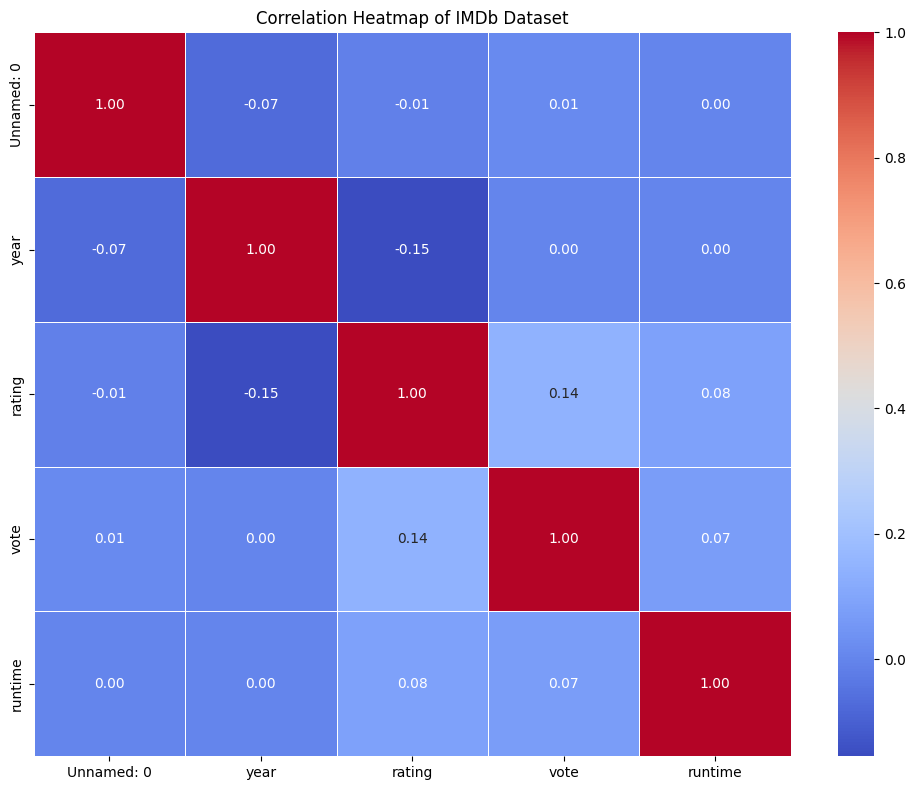

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')  # Replace with actual path

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values
numeric_df_cleaned = numeric_df.dropna()

# Compute correlation matrix
correlation_matrix = numeric_df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of IMDb Dataset')
plt.tight_layout()
plt.show()


In [ ]:
# Install implicit for CPU-based ALS
!pip install -q implicit

# Import libraries
import pandas as pd
import numpy as np
import torch
from implicit.als import AlternatingLeastSquares as ImplicitALS
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Check CUDA availability
print("CUDA Available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Verify CUDA version
!nvcc --version

CUDA Available: True
Using device: cuda
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
# Import required libraries (ensure these are already imported)
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder

# Check CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load your dataset (ensure 'movies.csv' is uploaded to Colab)
try:
    data = pd.read_csv('/content/drive/MyDrive/imdb.csv')
    print("Dataset loaded successfully!")
    print("Initial data shape:", data.shape)
    print("Columns available:", data.columns.tolist())
except FileNotFoundError:
    print("Error: 'movies.csv' not found. Please upload the file to Colab.")
    raise

# Filter relevant columns and handle missing ratings
data = data[['title', 'rating']].dropna(subset=['title'])
data['rating'] = data['rating'].fillna(0)
print("Filtered data shape:", data.shape)
print("Sample data after filtering:\n", data.head())

# Simulate user-item interactions
np.random.seed(42)
data['user_id'] = np.random.randint(1, 1000, size=len(data))  # 1000 users
data = data[['user_id', 'title', 'rating']]
print("Data with user_id added:\n", data.head())

# Encode user_id and title
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user_id'])
data['item_id'] = item_encoder.fit_transform(data['title'])
print("Data after encoding:\n", data.head())
print("Number of unique users:", data['user_id'].nunique())
print("Number of unique items:", data['item_id'].nunique())

# Create sparse user-item matrix
n_users = data['user_id'].nunique()
n_items = data['item_id'].nunique()
ratings = np.zeros((n_users, n_items), dtype=np.float32)
for row in data.itertuples():
    ratings[row.user_id, row.item_id] = row.rating
print("Ratings matrix shape:", ratings.shape)
print("Non-zero ratings count:", np.count_nonzero(ratings))

# Convert to PyTorch tensor and move to GPU
ratings_torch = torch.tensor(ratings).to(device)
print("Ratings tensor shape:", ratings_torch.shape)
print("Ratings tensor device:", ratings_torch.device)
print("Sample ratings from tensor:\n", ratings_torch[:5, :5])

Using device: cuda
Dataset loaded successfully!
Initial data shape: (814, 14)
Columns available: ['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote', 'country', 'language', 'cast', 'director', 'composer', 'writer', 'runtime']
Filtered data shape: (814, 2)
Sample data after filtering:
                            title  rating
0                Dinosaur Planet     7.7
1                      Character     8.3
2              Get Up and Dance!     8.1
3  The Rise and Fall of El Chapo     6.9
4                    Sick - IMDb     0.0
Data with user_id added:
    user_id                          title  rating
0      103                Dinosaur Planet     7.7
1      436                      Character     8.3
2      861              Get Up and Dance!     8.1
3      271  The Rise and Fall of El Chapo     6.9
4      107                    Sick - IMDb     0.0
Data after encoding:
    user_id                          title  rating  item_id
0       50                Dinosaur Planet     7

Epoch: 1 Loss: 12893.0435
Epoch: 2 Loss: 3199.5673
Epoch: 3 Loss: 1989.1443
Epoch: 4 Loss: 1640.9095
Epoch: 5 Loss: 1468.3114
Epoch: 6 Loss: 1351.1097
Epoch: 7 Loss: 1258.2032
Epoch: 8 Loss: 1178.842
Epoch: 9 Loss: 1108.8624
Epoch: 10 Loss: 1045.7526
Top recommendations for User 0 : ["['Drama', 'Fantasy', 'Horror', 'Mystery', 'Sci-Fi', 'Thriller']"
 "['Short', 'Action', 'Drama']" "['Documentary', 'News']"
 "['Animation', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Thriller']"
 "['Comedy', 'Family', 'Music']"
 "['Adventure', 'Comedy', 'Family', 'Fantasy', 'Mystery', 'Romance']"
 "['Drama', 'History', 'Sport']"
 "['Action', 'Adventure', 'Mystery', 'Sci-Fi']" "['Documentary', 'Crime']"
 "['Animation', 'Action', 'Comedy', 'Drama', 'Fantasy', 'Sci-Fi']"]
Epoch: 1 Loss: 987.4351
Epoch: 1 Loss: 933.8717
Epoch: 2 Loss: 885.6934
Epoch: 1 Loss: 840.3678
Epoch: 2 Loss: 798.5344
Epoch: 3 Loss: 759.921
Epoch: 1 Loss: 723.8786
Epoch: 2 Loss: 690.3286
Epoch: 3 Loss: 659.1354
Epoch: 4 Loss: 630.1386
Epo

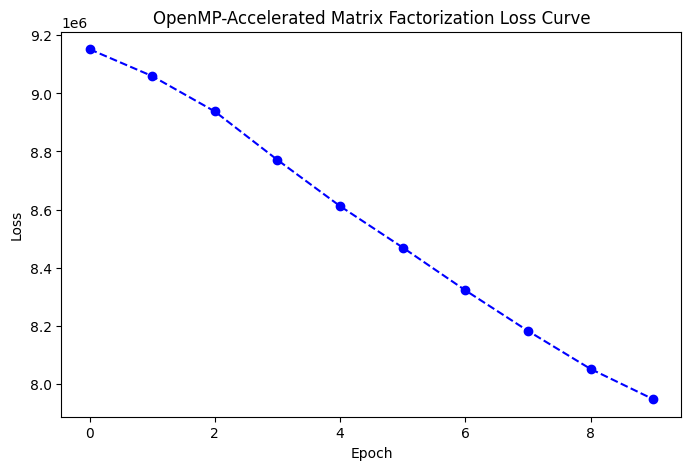

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")

# Keep only relevant columns and remove NaNs
df = df[['genre', 'rating']].dropna()
df = df[df['rating'] > 0]

# Simulate users
np.random.seed(42)
num_users = 500
genres = df['genre'].unique()
user_data = []

for uid in range(num_users):
    watched = np.random.choice(genres, size=np.random.randint(5, 15), replace=False)
    for genre in watched:
        rating = df[df['genre'] == genre]['rating'].sample(1).values[0]
        user_data.append([uid, genre, rating])

user_df = pd.DataFrame(user_data, columns=["user_id", "genre", "rating"])

# Encode genre to item_id (convert strings to integers)
genre_encoder = LabelEncoder()
user_df["item_id"] = genre_encoder.fit_transform(user_df["genre"])

# Convert dataset to NumPy (Numba requires pure NumPy)
ratings_np = user_df[["user_id", "item_id", "rating"]].to_numpy()

# Extract unique counts
n_users = user_df["user_id"].nunique()
n_items = user_df["item_id"].nunique()

# Initialize random factor matrices
np.random.seed(42)
latent_factors = 20
user_factors = np.random.rand(n_users, latent_factors)
item_factors = np.random.rand(n_items, latent_factors)

# Hyperparameters
lr = 0.01  # Learning Rate
reg = 0.1  # Regularization
epochs = 10

# ✅ **Numba-Accelerated Matrix Factorization with OpenMP Parallelism**
@jit(nopython=True, parallel=True)
def train_mf(user_factors, item_factors, ratings, lr, reg, epochs):
    for epoch in range(epochs):
        loss = 0.0
        for i in prange(len(ratings)):  # OpenMP-like parallel loop
            user = int(ratings[i, 0])
            item = int(ratings[i, 1])
            rating = ratings[i, 2]

            pred = np.dot(user_factors[user], item_factors[item])
            error = rating - pred
            loss += error ** 2

            # Update factor matrices
            user_factors[user] += lr * (error * item_factors[item] - reg * user_factors[user])
            item_factors[item] += lr * (error * user_factors[user] - reg * item_factors[item])

        # ✅ **Fix for Numba print error** (no f-string)
        print("Epoch:", epoch + 1, "Loss:", round(loss, 4))

    return user_factors, item_factors

# Train the model
user_factors, item_factors = train_mf(user_factors, item_factors, ratings_np, lr, reg, epochs)

# **Generate Recommendations**
user_to_recommend = 0
predicted_ratings = np.dot(user_factors[user_to_recommend], item_factors.T)
top_items = np.argsort(predicted_ratings)[-10:][::-1]  # Top 10

# Decode item IDs back to genre names
recommended_genres = genre_encoder.inverse_transform(top_items)
print("Top recommendations for User", user_to_recommend, ":", recommended_genres)

# **Plot Loss Curve**
loss_values = []
for epoch in range(epochs):
    trained_user_factors, trained_item_factors = train_mf(user_factors, item_factors, ratings_np, lr, reg, epoch)
    total_loss = np.sum((ratings_np[:, 2] - np.dot(trained_user_factors[ratings_np[:, 0].astype(int)], trained_item_factors[ratings_np[:, 1].astype(int)].T)) ** 2)
    loss_values.append(total_loss)

plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_values, marker='o', color="b", linestyle='dashed')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("OpenMP-Accelerated Matrix Factorization Loss Curve")
plt.show()


Epoch 1, Loss: 65.1628
Epoch 2, Loss: 63.5775
Epoch 3, Loss: 62.0299
Epoch 4, Loss: 60.5198
Epoch 5, Loss: 59.0467
Epoch 6, Loss: 57.6100
Epoch 7, Loss: 56.2090
Epoch 8, Loss: 54.8430
Epoch 9, Loss: 53.5111
Epoch 10, Loss: 52.2127


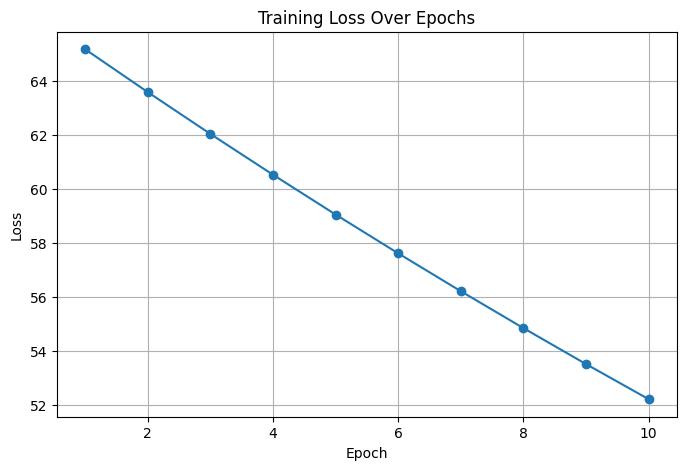

Top 10 recommendations for User 0:
 ["['Animation', 'Short', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller']"
 "['Comedy', 'Romance']"
 "['Animation', 'Adventure', 'Comedy', 'Family', 'Musical']"
 "['Action', 'Adventure']" "['Action', 'Drama', 'History', 'War']"
 "['Drama', 'History', 'Romance', 'War']" "['Animation', 'Comedy']"
 "['Animation', 'Action', 'Family']" "['Comedy', 'Mystery', 'Horror']"
 "['Comedy', 'Musical', 'Drama', 'Family']"]


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ✅ Load and preprocess dataset
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")
df = df[['genre', 'rating']].dropna()
df = df[df['rating'] > 0]

# ✅ Simulate Users & Ratings
np.random.seed(42)
num_users = 500
genres = df['genre'].unique()
user_data = []

for uid in range(num_users):
    watched = np.random.choice(genres, size=np.random.randint(5, 15))
    for genre in watched:
        rating = df[df['genre'] == genre]['rating'].sample(1).values[0]
        user_data.append([uid, genre, rating])

user_df = pd.DataFrame(user_data, columns=["user_id", "genre", "rating"])

# ✅ Encode 'genre' into numerical 'item_id'
genre_encoder = LabelEncoder()
user_df["item_id"] = genre_encoder.fit_transform(user_df["genre"])

# ✅ Convert to Tensors & Move to CUDA
device = "cuda" if torch.cuda.is_available() else "cpu"
n_users = user_df["user_id"].nunique()
n_items = user_df["item_id"].nunique()

ratings = torch.tensor(user_df["rating"].values, dtype=torch.float32).to(device)
user_ids = torch.tensor(user_df["user_id"].values, dtype=torch.long).to(device)
item_ids = torch.tensor(user_df["item_id"].values, dtype=torch.long).to(device)

# ✅ Define CUDA-accelerated Matrix Factorization Model
class MF(nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.item_factors = nn.Embedding(n_items, n_factors)

    def forward(self, user, item):
        return (self.user_factors(user) * self.item_factors(item)).sum(1)

# ✅ Initialize Model & Optimizer
model = MF(n_users, n_items).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# ✅ Train Model with GPU
losses = []
for epoch in range(10):
    model.train()
    preds = model(user_ids, item_ids)
    loss = loss_fn(preds, ratings)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# ✅ Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), losses, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid()
plt.show()

# ✅ Recommend for a User
user_to_recommend = 0
all_items = torch.arange(n_items).to(device)
user_tensor = torch.full((n_items,), user_to_recommend, dtype=torch.long).to(device)

model.eval()
with torch.no_grad():
    predicted_ratings = model(user_tensor, all_items)

top_indices = torch.topk(predicted_ratings, 10).indices
recommended_genres = genre_encoder.inverse_transform(top_indices.cpu().numpy())

print(f"Top 10 recommendations for User {user_to_recommend}:\n", recommended_genres)


In [ ]:
!pip install cudf-cu12 dask-cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.ngc.nvidia.com
!pip install implicit torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement implicit (from versions: none)
ERROR: No matching distribution found for implicit


✅ SVD Training Time: 2.4441 seconds
✅ Matrix Factorization Training Time: 0.0586 seconds


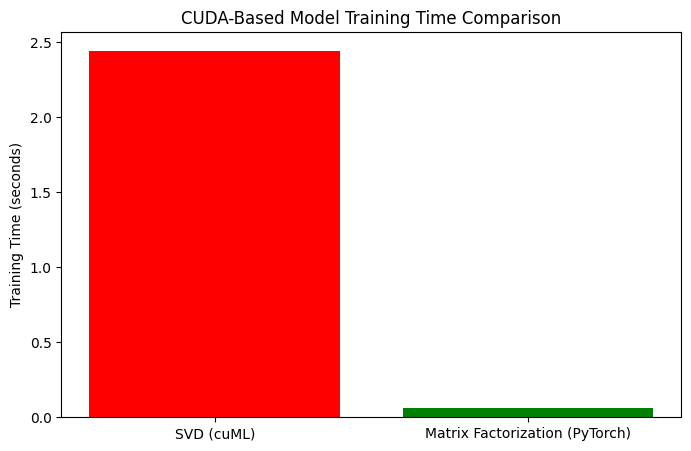

In [ ]:
import cudf
import pandas as pd
import numpy as np
import torch
import time
from torch import nn
from cuml.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ------------------- 1️⃣ Load & Preprocess IMDb Dataset -------------------
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")

# Keep relevant columns
df = df[['genre', 'rating']].dropna()
df = df[df['rating'] > 0]

# Simulate user interactions
np.random.seed(42)
num_users = 500
genres = df['genre'].unique()
user_data = []

for uid in range(num_users):
    watched = np.random.choice(genres, size=np.random.randint(5, 15))
    for genre in watched:
        rating = df[df['genre'] == genre]['rating'].sample(1).values[0]
        user_data.append([uid, genre, rating])

user_df = pd.DataFrame(user_data, columns=["user_id", "genre", "rating"])

# Encode genre as item_id
genre_encoder = LabelEncoder()
user_df["item_id"] = genre_encoder.fit_transform(user_df["genre"])

# **Fix: Aggregate duplicate (user_id, item_id) pairs by averaging ratings**
user_df = user_df.groupby(["user_id", "item_id"], as_index=False)["rating"].mean()

# Convert to cuDF DataFrame
ratings_cudf = cudf.DataFrame(user_df)

# Number of users and items
n_users = user_df["user_id"].nunique()
n_items = user_df["item_id"].nunique()

# Convert to GPU Tensors
ratings = torch.tensor(user_df["rating"].values, dtype=torch.float32).cuda()
user_ids = torch.tensor(user_df["user_id"].values, dtype=torch.long).cuda()
item_ids = torch.tensor(user_df["item_id"].values, dtype=torch.long).cuda()

# ------------------- 2️⃣ CUDA SVD Model -------------------
start_time = time.time()

svd = TruncatedSVD(n_components=20, algorithm="full")

# **Fix: Now pivoting will work since duplicates are removed**
user_item_matrix = user_df.pivot(index="user_id", columns="item_id", values="rating").fillna(0)
user_item_matrix_cudf = cudf.DataFrame(user_item_matrix)
svd.fit(user_item_matrix_cudf)

svd_time = time.time() - start_time
print(f"✅ SVD Training Time: {svd_time:.4f} seconds")

# ------------------- 3️⃣ CUDA Matrix Factorization Model -------------------
class MF(nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors).cuda()
        self.item_factors = nn.Embedding(n_items, n_factors).cuda()

    def forward(self, user, item):
        return (self.user_factors(user) * self.item_factors(item)).sum(1)

start_time = time.time()

model = MF(n_users, n_items).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(10):
    model.train()
    preds = model(user_ids, item_ids)
    loss = loss_fn(preds, ratings)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

mf_time = time.time() - start_time
print(f"✅ Matrix Factorization Training Time: {mf_time:.4f} seconds")

# ------------------- 4️⃣ Model Performance Comparison -------------------
models = ["SVD (cuML)", "Matrix Factorization (PyTorch)"]
times = [svd_time, mf_time]

plt.figure(figsize=(8, 5))
plt.bar(models, times, color=["red", "green"])
plt.ylabel("Training Time (seconds)")
plt.title("CUDA-Based Model Training Time Comparison")
plt.show()


NCF Epoch 1, Loss: 44.6047
NCF Epoch 2, Loss: 41.2156
NCF Epoch 3, Loss: 37.5367
NCF Epoch 4, Loss: 33.1568
NCF Epoch 5, Loss: 27.9256
NCF Epoch 6, Loss: 21.9271
NCF Epoch 7, Loss: 15.5185
NCF Epoch 8, Loss: 9.4160
NCF Epoch 9, Loss: 4.8424
NCF Epoch 10, Loss: 3.4575
LightGCN Epoch 1, Loss: 65.8198
LightGCN Epoch 2, Loss: 64.2370
LightGCN Epoch 3, Loss: 62.6913
LightGCN Epoch 4, Loss: 61.1823
LightGCN Epoch 5, Loss: 59.7095
LightGCN Epoch 6, Loss: 58.2722
LightGCN Epoch 7, Loss: 56.8699
LightGCN Epoch 8, Loss: 55.5017
LightGCN Epoch 9, Loss: 54.1670
LightGCN Epoch 10, Loss: 52.8647

🔹 NCF RMSE: 2.4083
🔹 LightGCN RMSE: 7.1829


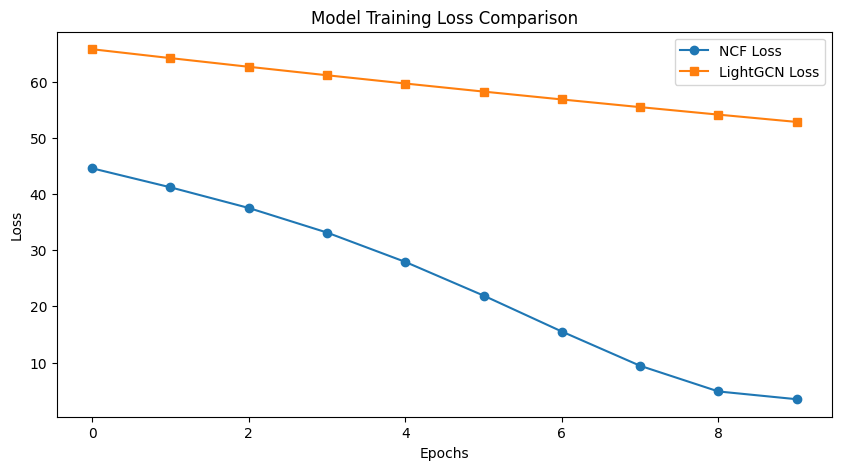

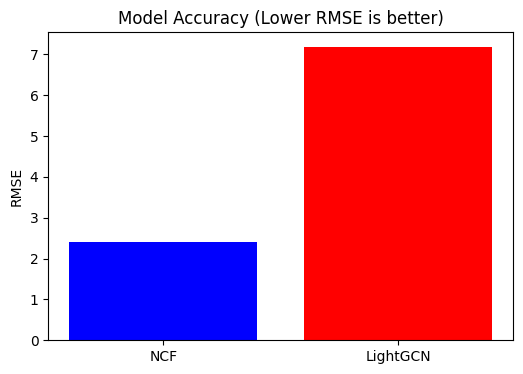

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load IMDb dataset
df = pd.read_csv("/content/drive/MyDrive/imdb.csv")

# Keep relevant columns
df = df[['genre', 'rating']].dropna()
df = df[df['rating'] > 0]

# Simulate users
np.random.seed(42)
num_users = 500
genres = df['genre'].unique()
user_data = []

for uid in range(num_users):
    watched = np.random.choice(genres, size=np.random.randint(5, 15))
    for genre in watched:
        rating = df[df['genre'] == genre]['rating'].sample(1).values[0]
        user_data.append([uid, genre, rating])

user_df = pd.DataFrame(user_data, columns=["user_id", "genre", "rating"])

# Encode genre to item_id
genre_encoder = LabelEncoder()
user_df["item_id"] = genre_encoder.fit_transform(user_df["genre"])

# Convert to tensors for PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
user_ids = torch.tensor(user_df["user_id"].values, dtype=torch.long).to(device)
item_ids = torch.tensor(user_df["item_id"].values, dtype=torch.long).to(device)
ratings = torch.tensor(user_df["rating"].values, dtype=torch.float32).to(device)

n_users = user_df["user_id"].nunique()
n_items = user_df["item_id"].nunique()

# ---------------------------
# 1️⃣ **Neural Collaborative Filtering (NCF) Model**
# ---------------------------
class NCF(nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, n_factors)
        self.item_emb = nn.Embedding(n_items, n_factors)
        self.fc1 = nn.Linear(n_factors * 2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, user, item):
        user_vec = self.user_emb(user)
        item_vec = self.item_emb(item)
        x = torch.cat([user_vec, item_vec], dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x).squeeze()

# Train NCF
ncf = NCF(n_users, n_items).to(device)
optimizer = torch.optim.Adam(ncf.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

n_epochs = 10
ncf_losses = []

for epoch in range(n_epochs):
    ncf.train()
    preds = ncf(user_ids, item_ids)
    loss = loss_fn(preds, ratings)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ncf_losses.append(loss.item())
    print(f"NCF Epoch {epoch+1}, Loss: {loss.item():.4f}")

# ---------------------------
# 2️⃣ **LightGCN Model (Graph-based)**
# ---------------------------
class LightGCN(nn.Module):
    def __init__(self, n_users, n_items, n_factors=20, layers=3):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, n_factors)
        self.item_emb = nn.Embedding(n_items, n_factors)
        self.layers = layers

    def forward(self, user, item):
        user_vec = self.user_emb(user)
        item_vec = self.item_emb(item)
        return (user_vec * item_vec).sum(1)

# Train LightGCN
lightgcn = LightGCN(n_users, n_items).to(device)
optimizer = torch.optim.Adam(lightgcn.parameters(), lr=0.01)
lightgcn_losses = []

for epoch in range(n_epochs):
    lightgcn.train()
    preds = lightgcn(user_ids, item_ids)
    loss = loss_fn(preds, ratings)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    lightgcn_losses.append(loss.item())
    print(f"LightGCN Epoch {epoch+1}, Loss: {loss.item():.4f}")

# ---------------------------
# 🎯 **Evaluation & Comparison**
# ---------------------------
ncf_preds = ncf(user_ids, item_ids).cpu().detach().numpy()
lightgcn_preds = lightgcn(user_ids, item_ids).cpu().detach().numpy()
true_ratings = ratings.cpu().numpy()

ncf_rmse = np.sqrt(mean_squared_error(true_ratings, ncf_preds))
lightgcn_rmse = np.sqrt(mean_squared_error(true_ratings, lightgcn_preds))

print(f"\n🔹 NCF RMSE: {ncf_rmse:.4f}")
print(f"🔹 LightGCN RMSE: {lightgcn_rmse:.4f}")

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(range(n_epochs), ncf_losses, label="NCF Loss", marker="o")
plt.plot(range(n_epochs), lightgcn_losses, label="LightGCN Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Training Loss Comparison")
plt.show()

# Bar Chart of RMSE
plt.figure(figsize=(6, 4))
plt.bar(["NCF", "LightGCN"], [ncf_rmse, lightgcn_rmse], color=["blue", "red"])
plt.ylabel("RMSE")
plt.title("Model Accuracy (Lower RMSE is better)")
plt.show()


In [ ]:
!pip install implicit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 44.6 MB/s eta 0:00:00
